In [16]:
import pandas as pd
import numpy as np
#import pandas_profiling as pp
#import sweetviz as sv

In [17]:
data=pd.read_csv("C:\\Users\\CHANDU\\Downloads\\mba.csv")
data
data.head()
data.tail(10)

,datasrno,workex,gmat
763,764,31,710
764,765,29,710
765,766,46,750
766,767,44,620
767,768,38,680
768,769,88,620
769,770,132,670
770,771,28,610
771,772,10,610
772,773,52,620


# Datastructure

In [18]:
type(data)#gives data types of all columns pandas.core.frame.dataframe

pandas.core.frame.DataFrame

In [19]:
data.shape
#gives the count of rows and columns

(773, 3)

# Datatypes

In [20]:
data.dtypes
#gives data types of each column if datatype is number it shows int, if it is decimal it shows float,
# if categorical value then it shows object

datasrno    int64
workex      int64
gmat        int64
dtype: object

# Data Type Conversion

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   datasrno  773 non-null    int64
 1   workex    773 non-null    int64
 2   gmat      773 non-null    int64
dtypes: int64(3)
memory usage: 18.2 KB


In [22]:
data1=data.iloc[:,1:]# takes all rows but skips 1st column
data1
#this is dataset without having extra columns

,workex,gmat
0,21,720
1,107,640
2,57,740
3,99,690
4,208,710
...,...,...
768,88,620
769,132,670
770,28,610
771,10,610


In [23]:
data2=data1.copy()
#the method.copy() is used here so that any changes made in new dataframe dont get reflected in the original one
data2

,workex,gmat
0,21,720
1,107,640
2,57,740
3,99,690
4,208,710
...,...,...
768,88,620
769,132,670
770,28,610
771,10,610


In [24]:
data.describe()
#describe will not give object datatype like month and tempc, which have categorical data in it

,datasrno,workex,gmat
count,773.00000,773.00000,773.000000
mean,387.00000,57.50194,711.164295
std,223.29017,27.38682,29.339714
min,1.00000,9.00000,600.000000
25%,194.00000,41.00000,690.000000
50%,387.00000,52.00000,710.000000
75%,580.00000,69.00000,730.000000
max,773.00000,279.00000,780.000000


# Duplicates

In [25]:
#count of duplicated rows
data2[data2.duplicated()].shape
#data2

(369, 2)

In [26]:
data2

,workex,gmat
0,21,720
1,107,640
2,57,740
3,99,690
4,208,710
...,...,...
768,88,620
769,132,670
770,28,610
771,10,610


In [27]:
#prints the duplicated rows
data2[data2.duplicated()]
data2.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
768    False
769    False
770    False
771    False
772     True
Length: 773, dtype: bool

In [28]:
#drops the duplicate values
data_cleaned1=data2.drop_duplicates()
#drops the duplicate values
data_cleaned1# 1 column drop

,workex,gmat
0,21,720
1,107,640
2,57,740
3,99,690
4,208,710
...,...,...
767,38,680
768,88,620
769,132,670
770,28,610


In [29]:
data_cleaned1.shape

(404, 2)

# Drop Columns

In [31]:
data_cleaned2=data.drop('datasrno',axis=1)
#to remove columns we use axis=1 and for removing of rows we use axis-0
#here Temp C is the column name which needs to be removed
data_cleaned2

,workex,gmat
0,21,720
1,107,640
2,57,740
3,99,690
4,208,710
...,...,...
768,88,620
769,132,670
770,28,610
771,10,610


# Missing values and Imputation

In [32]:
import seaborn as sns
%matplotlib inline
cols=data_cleaned2.columns
colours=['#000099','#ffff00']
# specifies the colors that is yellow is missing and blue is not missing

,workex,gmat


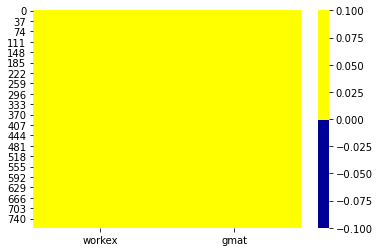

In [33]:
sns.heatmap(data_cleaned2[cols].isnull(),cmap=sns.color_palette(colours))
data_cleaned2[data_cleaned2.isnull().any(axis=1)].shape
data_cleaned2[data_cleaned2.isnull().any(axis=1)].head()
#it will give the entire table where there are null values
# if we mention head there it will give only first 5 values in the table
#if we dont mention head it will give entire table where there are null values

In [34]:
data_cleaned2.isnull()
#it will give False and True values
#beacuse it is difficult to count how many null values and how many non null values are there
#to count the null values we use below code 

,workex,gmat
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
768,False,False
769,False,False
770,False,False
771,False,False


In [35]:
data_cleaned2.isnull().sum()
# it will count the values of True's and False's and gives the sum opf total True values
#so that the value which comes will be the null values count
#if sum=50 it means there are 50 1's are there, 1's are true values so it tells that there are 50 null values

workex    0
gmat      0
dtype: int64

In [37]:
#Mean Imputation
mean = data_cleaned2['gmat'].mean()
print(mean)

711.1642949547219


# Outlier Detection

<AxesSubplot:>

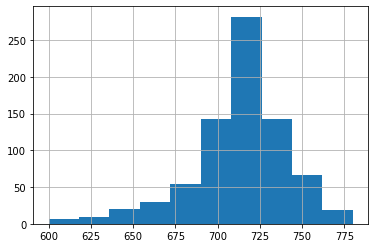

In [38]:
# histogram of Ozone
%matplotlib inline
data_cleaned2['gmat'].hist()

<AxesSubplot:>

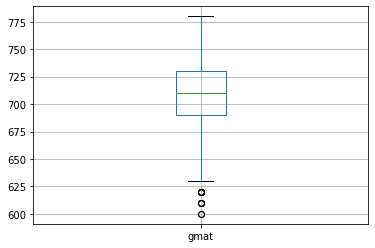

In [39]:
#Box plot
data_cleaned2.boxplot(column=['gmat'])

In [40]:
#Descriptive stat
data_cleaned2['gmat'].describe()

count    773.000000
mean     711.164295
std       29.339714
min      600.000000
25%      690.000000
50%      710.000000
75%      730.000000
max      780.000000
Name: gmat, dtype: float64

In [41]:
data_cleaned2

,workex,gmat
0,21,720
1,107,640
2,57,740
3,99,690
4,208,710
...,...,...
768,88,620
769,132,670
770,28,610
771,10,610


# Scatter plot and Correlation analysis

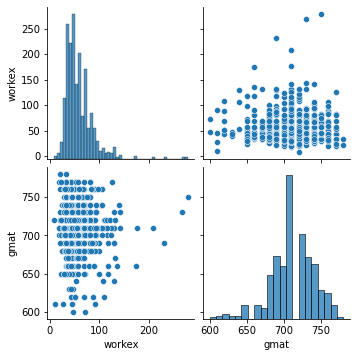

In [42]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data_cleaned2)

In [43]:
#Correlation
data_cleaned2.corr()

,workex,gmat
workex,1.000000,-0.032099
gmat,-0.032099,1.000000


# Transformations

In [44]:
#Creating dummy variable for Weather column
data_cleaned3=pd.get_dummies(data,columns=['workex'])

In [45]:
data_cleaned3

,datasrno,gmat,workex_9,workex_10,workex_19,workex_20,workex_21,workex_22,workex_23,workex_24,...,workex_136,workex_141,workex_142,workex_143,workex_175,workex_176,workex_208,workex_231,workex_268,workex_279
0,1,720,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,640,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,740,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,690,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,710,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,769,620,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
769,770,670,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
770,771,610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771,772,610,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Normalization of the data

In [46]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [47]:
data_cleaned3.values

array([[  1, 720,   0, ...,   0,   0,   0],
       [  2, 640,   0, ...,   0,   0,   0],
       [  3, 740,   0, ...,   0,   0,   0],
       ...,
       [771, 610,   0, ...,   0,   0,   0],
       [772, 610,   0, ...,   0,   0,   0],
       [773, 620,   0, ...,   0,   0,   0]], dtype=int64)

In [48]:
array = data_cleaned2.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.04 0.67]
 [0.36 0.22]
 [0.18 0.78]
 [0.33 0.5 ]
 [0.74 0.61]]


In [49]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [50]:
array = data_cleaned3.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)# 2 decimals printed as we used precision=2
print(rescaledX[0:5,:])

[[-1.73  0.3  -0.04 -0.04 -0.04 -0.06 16.02 -0.07 -0.05 -0.05 -0.05 -0.05
  -0.07 -0.1  -0.1  -0.1  -0.17 -0.25 -0.23 -0.09 -0.07 -0.09 -0.1  -0.09
  -0.11 -0.1  -0.1  -0.17 -0.24 -0.29 -0.21 -0.1  -0.08 -0.07 -0.1  -0.06
  -0.1  -0.11 -0.1  -0.13 -0.16 -0.24 -0.2  -0.09 -0.05 -0.05 -0.06 -0.05
  -0.06 -0.05 -0.09 -0.05 -0.16 -0.24 -0.15 -0.07 -0.08 -0.04 -0.06 -0.04
  -0.07 -0.06 -0.11 -0.1  -0.14 -0.13 -0.06 -0.04 -0.05 -0.06 -0.04 -0.05
  -0.07 -0.06 -0.08 -0.11 -0.1  -0.07 -0.04 -0.04 -0.04 -0.05 -0.04 -0.04
  -0.05 -0.05 -0.05 -0.04 -0.05 -0.04 -0.04 -0.04 -0.05 -0.04 -0.05 -0.04
  -0.04 -0.04 -0.04 -0.04 -0.04 -0.07 -0.06 -0.05 -0.04 -0.04 -0.04 -0.04
  -0.04 -0.04 -0.04 -0.04 -0.04 -0.04]
 [-1.73 -2.43 -0.04 -0.04 -0.04 -0.06 -0.06 -0.07 -0.05 -0.05 -0.05 -0.05
  -0.07 -0.1  -0.1  -0.1  -0.17 -0.25 -0.23 -0.09 -0.07 -0.09 -0.1  -0.09
  -0.11 -0.1  -0.1  -0.17 -0.24 -0.29 -0.21 -0.1  -0.08 -0.07 -0.1  -0.06
  -0.1  -0.11 -0.1  -0.13 -0.16 -0.24 -0.2  -0.09 -0.05 -0.05 -0.06 -0.05